# Name :  Chetan Shekhar Patil




# Project : QNA-Pro Module

In [4]:
# Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [2]:
df = pd.read_csv('train.csv')
df

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [3]:
# View Column Headers
df.columns

Index(['Class Index', 'Title', 'Description'], dtype='object')

In [4]:
# Checking null values in the dataset
print(df.isna().sum())
print(df.nunique())

Class Index    0
Title          0
Description    0
dtype: int64
Class Index         4
Title          114350
Description    118723
dtype: int64


In [5]:
categories = df['Class Index'].unique().tolist()
categories
# 1 : World 
# 2 : Sports
# 3 : Business
# 4 : Science

[3, 4, 2, 1]

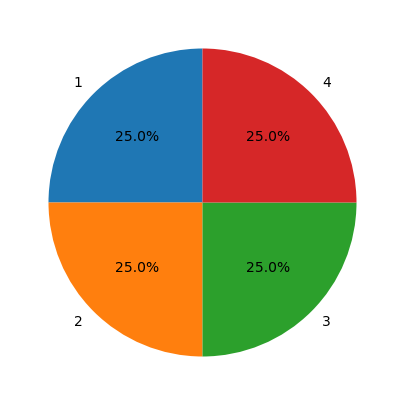

In [6]:
train_cats = df.groupby(by='Class Index').size()
fig, (ax1) = plt.subplots(1)
fig.set_size_inches(5,5)
# Ploting the data share for each category
ax1.pie(train_cats, labels=train_cats.index, autopct='%1.1f%%', startangle=90)

plt.show()

# 1 : World 
# 2 : Sports
# 3 : Business
# 4 : Science

In [7]:
# Duplicates Count
print('Duplicates in Training Data', df.duplicated(subset=['Title']).sum())

Duplicates in Training Data 5650


In [9]:
# Clean up Duplicates
df = df.drop_duplicates(subset=['Title'])

In [10]:
# Identify Duplicates Count
print('Duplicates in Training Data', df.duplicated(subset=['Title']).sum())

Duplicates in Training Data 0


In [11]:
print('shape after duplicate removal: ', df.shape)

shape after duplicate removal:  (114350, 3)


Cleanup & Preprocessing

In [13]:
stopwords_en = set(stopwords.words('english'))
def clean_white_spaces(text):
    # Replace
    text = text.lower().replace('\n', ' ').replace('\r', '').strip()
    # Replacing multiple spaces
    text = re.sub(' +', ' ', text)
    # Replacing all numeric or special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove stop words
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if not w in stopwords_en]
    text = ' '.join(tokens)
    
    return text
    

In [14]:
df['Title'] = df['Title'].apply(clean_white_spaces)
df['Description'] = df['Description'].apply(clean_white_spaces)
df.head()

,Class Index,Title,Description
0,3,wall st bears claw back black reuters,reuters shortsellers wall streets dwindlingban...
1,3,carlyle looks toward commercial aerospace reuters,reuters private investment firm carlyle groupw...
2,3,oil economy cloud stocks outlook reuters,reuters soaring crude prices plus worriesabout...
3,3,iraq halts oil exports main southern pipeline ...,reuters authorities halted oil exportflows mai...
4,3,oil prices soar alltime record posing new mena...,afp tearaway world oil prices toppling records...


In [15]:
df['Text'] = df['Title'] + ' ' + df['Description']
df.drop(['Title', 'Description'], axis=1, inplace=True)

In [16]:
df.head()

,Class Index,Text
0,3,wall st bears claw back black reuters reuters ...
1,3,carlyle looks toward commercial aerospace reut...
2,3,oil economy cloud stocks outlook reuters reute...
3,3,iraq halts oil exports main southern pipeline ...
4,3,oil prices soar alltime record posing new mena...


TF-IDF 

In [34]:
# creating TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# vectorize the text data
X = vectorizer.fit_transform(df['Text'])
# target
y = df['Class Index']

In [23]:
import joblib

In [24]:
joblib.dump(vectorizer, 'vectorizer2New.pkl')

['vectorizer2New.pkl']

Model Training - Linear SVC

In [16]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# train a SVM classifier on the training data
clf = SVC(kernel='linear').fit(X_train, y_train)

SVC Model Testing

In [18]:
# make predictions on the test data
y_pred = clf.predict(X_test)

SVC Model Evaluation

In [1]:
# evaluate the performance of the classifier

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: ",round(accuracy*100,3),"%")



Accuracy: 91.981 %


Model Training - Random Forest

In [6]:
# create the random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model on the training data
rf_model.fit(X_train, y_train)

RF Model Testing

In [21]:
# evaluate the model on the testing data
y_pred2 = rf_model.predict(X_test)

RF Model Evaluation

In [7]:
# evaluate the performance of the classifier

accuracy = accuracy_score(y_test, y_pred2)
print("\nAccuracy: ",round(accuracy*100,3),"%")

Accuracy:  79.624 %


In [25]:
joblib.dump(clf, 'model2NEW.pkl')

['model2NEW.pkl']